In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


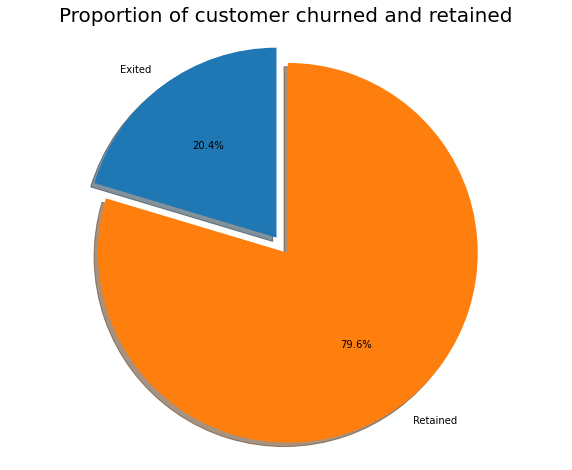

In [213]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.



<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

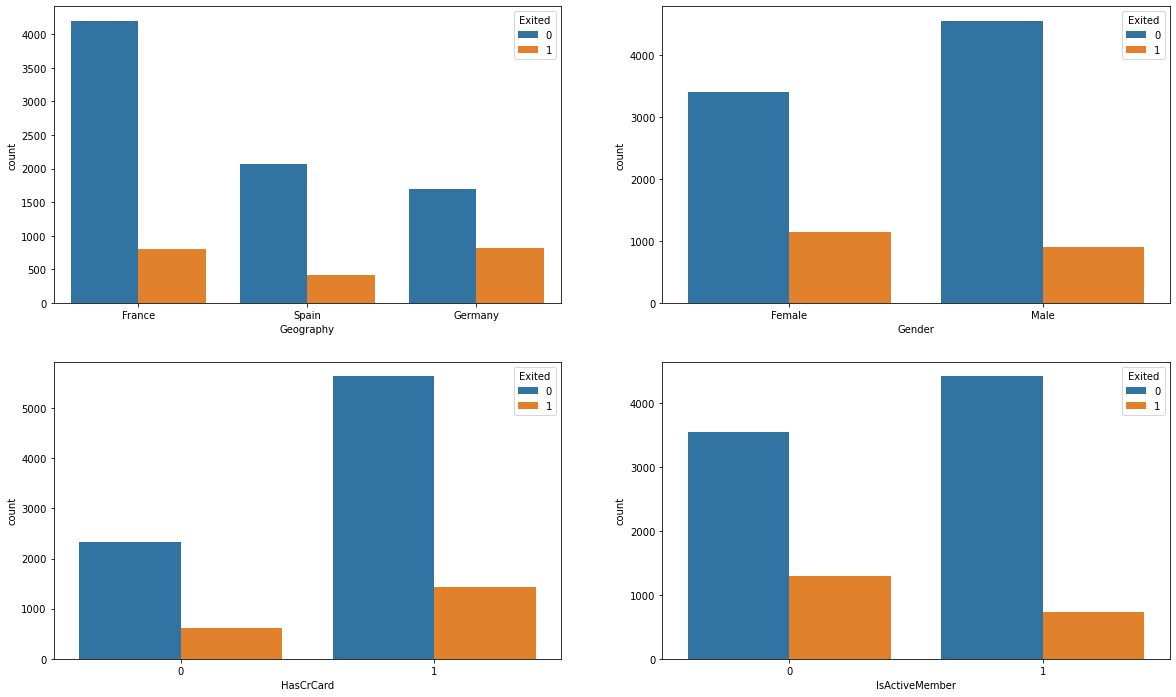

In [214]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

We note the following:

- Majority of the data is from persons from France & Germany. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.

- The proportion of female customers churning is also greater than that of male customers.

- Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

- Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

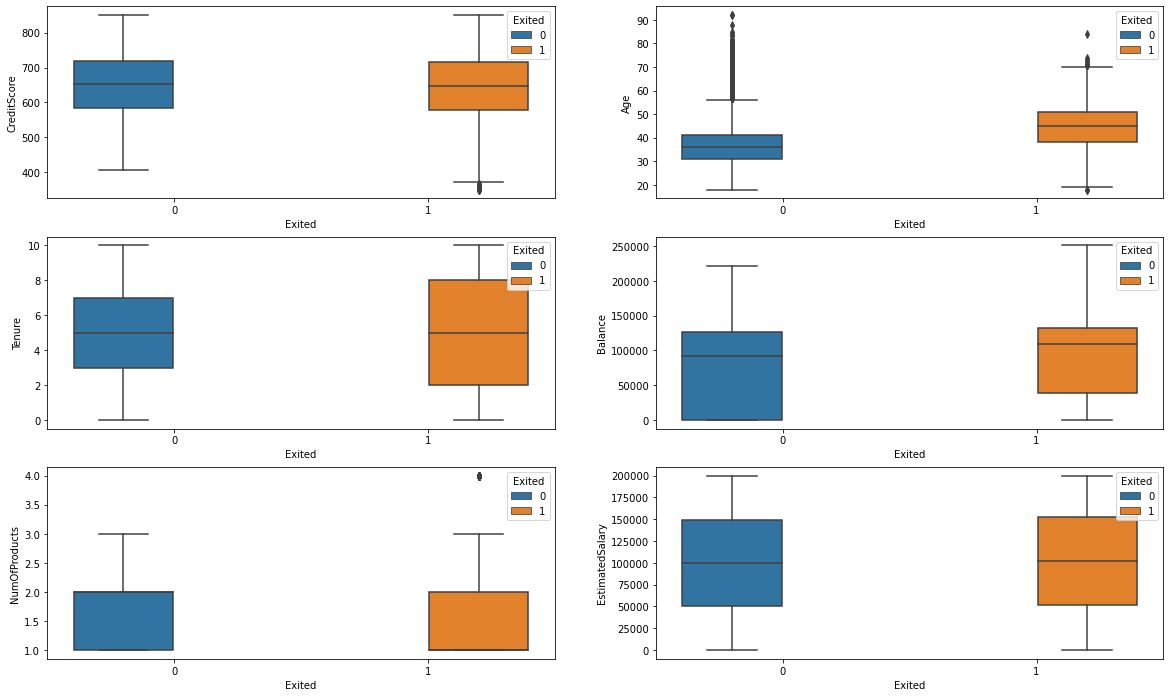

In [217]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])


We note the following:

- There is no significant difference in the credit score distribution between retained and churned customers.
- The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
- With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
- Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
- Neither the product nor the salary has a significant effect on the likelihood to churn.

In [33]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [34]:
df[df.Exited==0].shape

(7963, 11)

In [35]:
df[df.Exited==1].shape

(2037, 11)

In [36]:
df['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [37]:
df=pd.get_dummies(df,columns=['Geography'])

In [43]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [46]:
df.drop('Geography_Spain',axis=1,inplace=True)

In [47]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0


In [48]:
cols_to_scale=['CreditScore','Age','Balance','EstimatedSalary']

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [50]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,0.538,0,0.324324,2,0.000000,1,1,1,0.506735,1,1,0
1,0.516,0,0.310811,1,0.334031,1,0,1,0.562709,0,0,0
2,0.304,0,0.324324,8,0.636357,3,1,0,0.569654,1,1,0
3,0.698,0,0.283784,1,0.000000,2,0,0,0.469120,0,1,0
4,1.000,0,0.337838,2,0.500246,1,1,1,0.395400,0,0,0


In [51]:
X=df.drop(['Exited'],axis=1)
y=df['Exited']

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [61]:
X_train.shape

(8000, 11)

In [62]:
X_test.shape

(2000, 11)

In [63]:
import tensorflow as tf
from tensorflow import keras

In [64]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):

    model=keras.Sequential([
        keras.layers.Dense(20,input_shape=(11,),activation='relu'),
        keras.layers.Dense(40,activation='relu'),
        keras.layers.Dense(80,activation='relu'),
        keras.layers.Dense(40,activation='relu'),
        keras.layers.Dense(20,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss=loss,
                  metrics=['accuracy'])
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight=weights)
        
    print(model.evaluate(X_test,y_test))
    
    y_pred=model.predict(X_test)
    y_pred=np.round(y_pred)
    
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    return y_pred


In [79]:
y_pred=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',0)

Epoch 1/100
8000/8000 [==============================] - 0s 51us/sample - loss: 0.5061 - acc: 0.7910
Epoch 2/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.4661 - acc: 0.7989
Epoch 3/100
8000/8000 [==============================] - 0s 34us/sample - loss: 0.4494 - acc: 0.8029
Epoch 4/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.4256 - acc: 0.8185
Epoch 5/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.4052 - acc: 0.8259
Epoch 6/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3894 - acc: 0.8339
Epoch 7/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3796 - acc: 0.8382
Epoch 8/100
8000/8000 [==============================] - 0s 36us/sample - loss: 0.3757 - acc: 0.8413
Epoch 9/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3700 - acc: 0.8436
Epoch 10/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.3629 - a

8000/8000 [==============================] - 0s 37us/sample - loss: 0.2806 - acc: 0.8844
Epoch 82/100
8000/8000 [==============================] - 0s 36us/sample - loss: 0.2745 - acc: 0.8880
Epoch 83/100
8000/8000 [==============================] - 0s 35us/sample - loss: 0.2715 - acc: 0.8869
Epoch 84/100
8000/8000 [==============================] - 0s 38us/sample - loss: 0.2708 - acc: 0.8857
Epoch 85/100
8000/8000 [==============================] - 0s 37us/sample - loss: 0.2722 - acc: 0.8842
Epoch 86/100
8000/8000 [==============================] - 0s 36us/sample - loss: 0.2735 - acc: 0.8867
Epoch 87/100
8000/8000 [==============================] - 0s 38us/sample - loss: 0.2708 - acc: 0.8892
Epoch 88/100
8000/8000 [==============================] - 0s 37us/sample - loss: 0.2667 - acc: 0.8884
Epoch 89/100
8000/8000 [==============================] - 0s 37us/sample - loss: 0.2660 - acc: 0.8895
Epoch 90/100
8000/8000 [==============================] - 0s 37us/sample - loss: 0.2639 - acc: 

In [80]:
y_pred[:5]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [70]:
y_test[:5]

9394    0
898     1
2398    0
5906    0
2343    0
Name: Exited, dtype: int64

In [81]:
from sklearn.metrics import confusion_matrix,classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1595
           1       0.58      0.58      0.58       405

    accuracy                           0.83      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.83      0.83      0.83      2000



### Method 1 : Under Sampling

In [82]:
count_class_0,count_class_1=df.Exited.value_counts()


In [83]:
count_class_0

7963

In [84]:
count_class_1

2037

In [85]:
df_class_0=df[df['Exited']==0]
df_class_1=df[df['Exited']==1]

In [97]:
df_class_0.shape

(7963, 12)

In [86]:
df_class_0_under=df_class_0.sample(count_class_1)

df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape
print(df_test_under.Exited.value_counts())

1    2037
0    2037
Name: Exited, dtype: int64


In [98]:
X=df_test_under.drop('Exited',axis=1)
y=df_test_under['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=15,stratify=y,test_size=0.2)

In [99]:
X_train.shape

(3259, 11)

In [100]:
X_test.shape

(815, 11)

In [101]:
y_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [102]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',0)

Epoch 1/100
3259/3259 [==============================] - 0s 82us/sample - loss: 0.6655 - acc: 0.6122
Epoch 2/100
3259/3259 [==============================] - 0s 36us/sample - loss: 0.6282 - acc: 0.6600
Epoch 3/100
3259/3259 [==============================] - 0s 37us/sample - loss: 0.6108 - acc: 0.6757
Epoch 4/100
3259/3259 [==============================] - 0s 36us/sample - loss: 0.5770 - acc: 0.7024
Epoch 5/100
3259/3259 [==============================] - 0s 36us/sample - loss: 0.5540 - acc: 0.7165
Epoch 6/100
3259/3259 [==============================] - 0s 37us/sample - loss: 0.5311 - acc: 0.7352
Epoch 7/100
3259/3259 [==============================] - 0s 37us/sample - loss: 0.5165 - acc: 0.7438
Epoch 8/100
3259/3259 [==============================] - 0s 37us/sample - loss: 0.5201 - acc: 0.7373
Epoch 9/100
3259/3259 [==============================] - 0s 37us/sample - loss: 0.4997 - acc: 0.7564
Epoch 10/100
3259/3259 [==============================] - 0s 37us/sample - loss: 0.4970 - a

3259/3259 [==============================] - 0s 37us/sample - loss: 0.3048 - acc: 0.8631
Epoch 81/100
3259/3259 [==============================] - 0s 36us/sample - loss: 0.3130 - acc: 0.8524
Epoch 82/100
3259/3259 [==============================] - 0s 38us/sample - loss: 0.2962 - acc: 0.8647
Epoch 83/100
3259/3259 [==============================] - 0s 44us/sample - loss: 0.3192 - acc: 0.8460
Epoch 84/100
3259/3259 [==============================] - 0s 44us/sample - loss: 0.3071 - acc: 0.8662
Epoch 85/100
3259/3259 [==============================] - 0s 40us/sample - loss: 0.3033 - acc: 0.8610
Epoch 86/100
3259/3259 [==============================] - 0s 37us/sample - loss: 0.2912 - acc: 0.8699
Epoch 87/100
3259/3259 [==============================] - 0s 40us/sample - loss: 0.2913 - acc: 0.8631
Epoch 88/100
3259/3259 [==============================] - 0s 44us/sample - loss: 0.2816 - acc: 0.8711
Epoch 89/100
3259/3259 [==============================] - ETA: 0s - loss: 0.2749 - acc: 0.871 -

## Method 2 : Over Sampling

In [103]:
count_class_0,count_class_1

(7963, 2037)

In [104]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

In [105]:
df_class_1_over.Exited.value_counts()

1    7963
Name: Exited, dtype: int64

In [106]:
df_class_0.Exited.value_counts()

0    7963
Name: Exited, dtype: int64

In [107]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.Exited.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [108]:
X=df_test_over.drop('Exited',axis=1)
y=df_test_over['Exited']

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [110]:
X_train.shape

(12740, 11)

In [111]:
y_test.shape

(3186,)

In [112]:
y_train.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

In [113]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
12740/12740 [==============================] - 1s 48us/sample - loss: 0.6101 - acc: 0.6668
Epoch 2/100
12740/12740 [==============================] - 0s 35us/sample - loss: 0.5343 - acc: 0.7337
Epoch 3/100
12740/12740 [==============================] - 0s 35us/sample - loss: 0.5054 - acc: 0.7505
Epoch 4/100
12740/12740 [==============================] - 0s 35us/sample - loss: 0.4904 - acc: 0.7606
Epoch 5/100
12740/12740 [==============================] - 0s 35us/sample - loss: 0.4820 - acc: 0.7653
Epoch 6/100
12740/12740 [==============================] - 0s 35us/sample - loss: 0.4731 - acc: 0.7712
Epoch 7/100
12740/12740 [==============================] - 0s 35us/sample - loss: 0.4675 - acc: 0.7746
Epoch 8/100
12740/12740 [==============================] - 0s 36us/sample - loss: 0.4599 - acc: 0.7786
Epoch 9/100
12740/12740 [==============================] - 0s 35us/sample - loss: 0.4564 - acc: 0.7797
Epoch 10/100
12740/12740 [==============================] - 0s 35us/sampl

12740/12740 [==============================] - 1s 41us/sample - loss: 0.2363 - acc: 0.8978
Epoch 80/100
12740/12740 [==============================] - 1s 41us/sample - loss: 0.2347 - acc: 0.8981
Epoch 81/100
12740/12740 [==============================] - 1s 41us/sample - loss: 0.2259 - acc: 0.9030
Epoch 82/100
12740/12740 [==============================] - 1s 41us/sample - loss: 0.2275 - acc: 0.9020
Epoch 83/100
12740/12740 [==============================] - 1s 40us/sample - loss: 0.2240 - acc: 0.9021
Epoch 84/100
12740/12740 [==============================] - 1s 40us/sample - loss: 0.2283 - acc: 0.9041
Epoch 85/100
12740/12740 [==============================] - 1s 40us/sample - loss: 0.2198 - acc: 0.9092
Epoch 86/100
12740/12740 [==============================] - 1s 40us/sample - loss: 0.2223 - acc: 0.9075
Epoch 87/100
12740/12740 [==============================] - 1s 40us/sample - loss: 0.2160 - acc: 0.9092
Epoch 88/100
12740/12740 [==============================] - 1s 40us/sample - 

### Method 3 : SMOTE

In [120]:
X=df.drop('Exited',axis='columns')
y=df['Exited']

In [121]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [122]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_sample(X,y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [123]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,random_state=15,stratify=y_sm,test_size=0.2)

In [124]:
y_train.value_counts()

1    6370
0    6370
Name: Exited, dtype: int64

In [125]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
12740/12740 [==============================] - 1s 58us/sample - loss: 0.6384 - acc: 0.6273
Epoch 2/100
12740/12740 [==============================] - 0s 37us/sample - loss: 0.5661 - acc: 0.7088
Epoch 3/100
12740/12740 [==============================] - 0s 38us/sample - loss: 0.5225 - acc: 0.7418
Epoch 4/100
12740/12740 [==============================] - 0s 38us/sample - loss: 0.4922 - acc: 0.7593
Epoch 5/100
12740/12740 [==============================] - 0s 37us/sample - loss: 0.4709 - acc: 0.7676
Epoch 6/100
12740/12740 [==============================] - 0s 37us/sample - loss: 0.4623 - acc: 0.7756
Epoch 7/100
12740/12740 [==============================] - 0s 37us/sample - loss: 0.4547 - acc: 0.7839
Epoch 8/100
12740/12740 [==============================] - 0s 37us/sample - loss: 0.4516 - acc: 0.7802
Epoch 9/100
12740/12740 [==============================] - 1s 43us/sample - loss: 0.4422 - acc: 0.7900
Epoch 10/100
12740/12740 [==============================] - 0s 37us/sampl

12740/12740 [==============================] - 1s 45us/sample - loss: 0.2777 - acc: 0.8781
Epoch 80/100
12740/12740 [==============================] - 1s 44us/sample - loss: 0.2762 - acc: 0.8773
Epoch 81/100
12740/12740 [==============================] - 1s 45us/sample - loss: 0.2778 - acc: 0.8763
Epoch 82/100
12740/12740 [==============================] - 1s 45us/sample - loss: 0.2754 - acc: 0.8778
Epoch 83/100
12740/12740 [==============================] - 1s 44us/sample - loss: 0.2684 - acc: 0.87800s - loss: 0.2667 - acc: 0.8
Epoch 84/100
12740/12740 [==============================] - 1s 43us/sample - loss: 0.2678 - acc: 0.8819
Epoch 85/100
12740/12740 [==============================] - 1s 43us/sample - loss: 0.2673 - acc: 0.8793
Epoch 86/100
12740/12740 [==============================] - ETA: 0s - loss: 0.2678 - acc: 0.879 - 1s 43us/sample - loss: 0.2669 - acc: 0.8802
Epoch 87/100
12740/12740 [==============================] - 1s 57us/sample - loss: 0.2626 - acc: 0.8819
Epoch 88/10

### Method 4: use of Ensemble with undersampling

In [163]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [164]:
df3_class0=df[df.Exited==0]
df3_class1=df[df.Exited==1]

In [165]:
df3_class0.shape

(7963, 12)

In [189]:
7963/4

1990.75

In [167]:
df3_class1.shape

(2037, 12)

In [171]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    
    X=df_train.drop('Exited',axis='columns')
    y=df_train['Exited']
    
    return X,y

In [190]:
X_en,y_en=get_train_batch(df3_class0,df3_class1,0,1990)
y_en.value_counts()

1    2037
0    1990
Name: Exited, dtype: int64

In [191]:
X_train,X_test,y_train,y_test=train_test_split(X_en,y_en,random_state=15,stratify=y_en,test_size=0.2)

In [192]:
y_pred1=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
3221/3221 [==============================] - 0s 120us/sample - loss: 0.6647 - acc: 0.5955
Epoch 2/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.6262 - acc: 0.6541
Epoch 3/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.6018 - acc: 0.6762
Epoch 4/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.5735 - acc: 0.6989
Epoch 5/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.5618 - acc: 0.7016
Epoch 6/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.5375 - acc: 0.7234
Epoch 7/100
3221/3221 [==============================] - 0s 48us/sample - loss: 0.5196 - acc: 0.7395
Epoch 8/100
3221/3221 [==============================] - 0s 46us/sample - loss: 0.5143 - acc: 0.7423
Epoch 9/100
3221/3221 [==============================] - 0s 46us/sample - loss: 0.4987 - acc: 0.7541
Epoch 10/100
3221/3221 [==============================] - 0s 51us/sample - loss: 0.4930 - 

3221/3221 [==============================] - 0s 50us/sample - loss: 0.3490 - acc: 0.8314
Epoch 82/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.3479 - acc: 0.8382
Epoch 83/100
3221/3221 [==============================] - 0s 46us/sample - loss: 0.3420 - acc: 0.8398
Epoch 84/100
3221/3221 [==============================] - 0s 46us/sample - loss: 0.3446 - acc: 0.8376
Epoch 85/100
3221/3221 [==============================] - 0s 46us/sample - loss: 0.3415 - acc: 0.8429
Epoch 86/100
3221/3221 [==============================] - 0s 48us/sample - loss: 0.3427 - acc: 0.8348
Epoch 87/100
3221/3221 [==============================] - 0s 48us/sample - loss: 0.3272 - acc: 0.8525
Epoch 88/100
3221/3221 [==============================] - 0s 48us/sample - loss: 0.3276 - acc: 0.8466
Epoch 89/100
3221/3221 [==============================] - 0s 48us/sample - loss: 0.3326 - acc: 0.8414
Epoch 90/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.3282 - acc: 

In [193]:
X_en_1,y_en_1=get_train_batch(df3_class0,df3_class1,1991,3981)
y_en_1.value_counts()

1    2037
0    1990
Name: Exited, dtype: int64

In [194]:
X_train,X_test,y_train,y_test=train_test_split(X_en_1,y_en_1,random_state=15,stratify=y_en_1,test_size=0.2)

In [195]:
y_pred2=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
3221/3221 [==============================] - 0s 125us/sample - loss: 0.6905 - acc: 0.5275
Epoch 2/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.6610 - acc: 0.6073
Epoch 3/100
3221/3221 [==============================] - 0s 48us/sample - loss: 0.6372 - acc: 0.6368
Epoch 4/100
3221/3221 [==============================] - 0s 50us/sample - loss: 0.6322 - acc: 0.6433
Epoch 5/100
3221/3221 [==============================] - 0s 49us/sample - loss: 0.6159 - acc: 0.6687
Epoch 6/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.5994 - acc: 0.6818
Epoch 7/100
3221/3221 [==============================] - 0s 49us/sample - loss: 0.5860 - acc: 0.6902
Epoch 8/100
3221/3221 [==============================] - 0s 48us/sample - loss: 0.5667 - acc: 0.7082
Epoch 9/100
3221/3221 [==============================] - 0s 48us/sample - loss: 0.5583 - acc: 0.7144
Epoch 10/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.5510 - 

3221/3221 [==============================] - 0s 50us/sample - loss: 0.3709 - acc: 0.8324
Epoch 82/100
3221/3221 [==============================] - 0s 46us/sample - loss: 0.3658 - acc: 0.8314
Epoch 83/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.3714 - acc: 0.8249
Epoch 84/100
3221/3221 [==============================] - 0s 46us/sample - loss: 0.3628 - acc: 0.8296
Epoch 85/100
3221/3221 [==============================] - 0s 46us/sample - loss: 0.3638 - acc: 0.8292
Epoch 86/100
3221/3221 [==============================] - 0s 46us/sample - loss: 0.3591 - acc: 0.8348
Epoch 87/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.3618 - acc: 0.8348
Epoch 88/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.3625 - acc: 0.8330
Epoch 89/100
3221/3221 [==============================] - 0s 46us/sample - loss: 0.3566 - acc: 0.8330
Epoch 90/100
3221/3221 [==============================] - 0s 47us/sample - loss: 0.3567 - acc: 

In [196]:
X_en_2,y_en_2=get_train_batch(df3_class0,df3_class1,3982,5971)
y_en_2.value_counts()

1    2037
0    1989
Name: Exited, dtype: int64

In [197]:
X_train,X_test,y_train,y_test=train_test_split(X_en_2,y_en_2,random_state=15,stratify=y_en_2,test_size=0.2)

In [198]:
y_pred3=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
3220/3220 [==============================] - 0s 126us/sample - loss: 0.6643 - acc: 0.5938
Epoch 2/100
3220/3220 [==============================] - 0s 47us/sample - loss: 0.6145 - acc: 0.6606
Epoch 3/100
3220/3220 [==============================] - 0s 47us/sample - loss: 0.5816 - acc: 0.6960
Epoch 4/100
3220/3220 [==============================] - 0s 47us/sample - loss: 0.5615 - acc: 0.7062
Epoch 5/100
3220/3220 [==============================] - 0s 47us/sample - loss: 0.5350 - acc: 0.7329
Epoch 6/100
3220/3220 [==============================] - 0s 48us/sample - loss: 0.5237 - acc: 0.7311
Epoch 7/100
3220/3220 [==============================] - 0s 48us/sample - loss: 0.5178 - acc: 0.7432
Epoch 8/100
3220/3220 [==============================] - 0s 47us/sample - loss: 0.5136 - acc: 0.7422
Epoch 9/100
3220/3220 [==============================] - 0s 45us/sample - loss: 0.5066 - acc: 0.7447
Epoch 10/100
3220/3220 [==============================] - 0s 49us/sample - loss: 0.5097 - 

3220/3220 [==============================] - 0s 50us/sample - loss: 0.3548 - acc: 0.8332
Epoch 82/100
3220/3220 [==============================] - 0s 46us/sample - loss: 0.3451 - acc: 0.8379
Epoch 83/100
3220/3220 [==============================] - 0s 47us/sample - loss: 0.3426 - acc: 0.8435
Epoch 84/100
3220/3220 [==============================] - 0s 47us/sample - loss: 0.3427 - acc: 0.8429
Epoch 85/100
3220/3220 [==============================] - 0s 47us/sample - loss: 0.3374 - acc: 0.8457
Epoch 86/100
3220/3220 [==============================] - 0s 47us/sample - loss: 0.3354 - acc: 0.8435
Epoch 87/100
3220/3220 [==============================] - 0s 47us/sample - loss: 0.3361 - acc: 0.8385
Epoch 88/100
3220/3220 [==============================] - 0s 46us/sample - loss: 0.3325 - acc: 0.8484
Epoch 89/100
3220/3220 [==============================] - 0s 46us/sample - loss: 0.3370 - acc: 0.8425
Epoch 90/100
3220/3220 [==============================] - 0s 46us/sample - loss: 0.3404 - acc: 

In [199]:
X_en_3,y_en_3=get_train_batch(df3_class0,df3_class1,5972,7963)
y_en_3.value_counts()

1    2037
0    1991
Name: Exited, dtype: int64

In [200]:
X_train,X_test,y_train,y_test=train_test_split(X_en_3,y_en_3,random_state=15,stratify=y_en_3,test_size=0.21)
X_test.shape

(846, 11)

In [201]:
y_pred4=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
3182/3182 [==============================] - 0s 130us/sample - loss: 0.6792 - acc: 0.5701
Epoch 2/100
3182/3182 [==============================] - 0s 48us/sample - loss: 0.6420 - acc: 0.6364
Epoch 3/100
3182/3182 [==============================] - 0s 53us/sample - loss: 0.5998 - acc: 0.6820
Epoch 4/100
3182/3182 [==============================] - 0s 51us/sample - loss: 0.5578 - acc: 0.7165
Epoch 5/100
3182/3182 [==============================] - 0s 51us/sample - loss: 0.5334 - acc: 0.7351
Epoch 6/100
3182/3182 [==============================] - 0s 51us/sample - loss: 0.5147 - acc: 0.7420
Epoch 7/100
3182/3182 [==============================] - 0s 51us/sample - loss: 0.5032 - acc: 0.7517
Epoch 8/100
3182/3182 [==============================] - 0s 52us/sample - loss: 0.5032 - acc: 0.7492
Epoch 9/100
3182/3182 [==============================] - 0s 52us/sample - loss: 0.4999 - acc: 0.7527
Epoch 10/100
3182/3182 [==============================] - 0s 51us/sample - loss: 0.4804 - 

3182/3182 [==============================] - 0s 51us/sample - loss: 0.3402 - acc: 0.8378
Epoch 81/100
3182/3182 [==============================] - 0s 49us/sample - loss: 0.3416 - acc: 0.8429
Epoch 82/100
3182/3182 [==============================] - 0s 48us/sample - loss: 0.3434 - acc: 0.8454
Epoch 83/100
3182/3182 [==============================] - 0s 50us/sample - loss: 0.3403 - acc: 0.8451
Epoch 84/100
3182/3182 [==============================] - 0s 49us/sample - loss: 0.3353 - acc: 0.8419
Epoch 85/100
3182/3182 [==============================] - 0s 50us/sample - loss: 0.3270 - acc: 0.8520
Epoch 86/100
3182/3182 [==============================] - 0s 50us/sample - loss: 0.3306 - acc: 0.8488
Epoch 87/100
3182/3182 [==============================] - 0s 47us/sample - loss: 0.3274 - acc: 0.8495
Epoch 88/100
3182/3182 [==============================] - 0s 48us/sample - loss: 0.3282 - acc: 0.8523
Epoch 89/100
3182/3182 [==============================] - 0s 50us/sample - loss: 0.3261 - acc: 

In [202]:
len(y_test)

846

In [203]:
y_pred3.shape


(806, 1)

In [204]:
y_pred_final=y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

y_test.shape 

(846,)

In [206]:
print(classification_report(y_test[:806],y_pred_final))

              precision    recall  f1-score   support

           0       0.47      0.50      0.49       399
           1       0.48      0.45      0.47       407

    accuracy                           0.48       806
   macro avg       0.48      0.48      0.48       806
weighted avg       0.48      0.48      0.48       806



So, based on all possible techniques "Over Sampling Technique" and "SMOTE" has performed the best. Hence, we can use either of the models to predict probable 
customers with churn possibility.